## Study 1:
# Missing Trials

In [26]:
import os
import pandas as pd
import numpy as np
import scipy.stats 
import re
import matplotlib.pyplot as plt
from natsort import natsorted

In [30]:
subs=[sub for sub in os.listdir('../../istart/risk_amb/data') if sub.startswith('sub-')]
remove=['sub-1999','sub-1276','sub-practice','sub-timing']
subs =natsorted([sub for sub in subs if not sub in remove])
risk_files=['../../istart/risk_amb/data/%s/%s_task-risk_events.csv'%(sub,sub) for sub in subs]
amb_files=['../../istart/risk_amb/data/%s/%s_task-ambiguity_events.csv'%(sub,sub) for sub in subs]
df=[]
for f in risk_files:
    sub=re.search('data/(.*)/sub',f).group(1)
    if os.path.exists(f):
        tmp=pd.read_csv(f)
        tmp['sub']=sub
        df.append(tmp)
risk_df=pd.concat(df)
df=[]
for f in amb_files:
    sub=re.search('data/(.*)/sub',f).group(1)
    if os.path.exists(f):
        tmp=pd.read_csv(f)
        tmp['sub']=sub
        df.append(tmp)
amb_df=pd.concat(df)
risk_df

,LotisLeft,Lot_per,Lot_mon,Lot_color,Sure_mon,dist,response,RT,sub
0,1,10,13,blue,7,wide,['j'],4.146035,sub-1001
1,0,0,13,blue,7,wide,['f'],2.024450,sub-1001
2,0,0,13,blue,7,wide,['f'],1.240390,sub-1001
3,1,90,13,blue,7,wide,['f'],1.525565,sub-1001
4,0,100,13,blue,7,wide,['j'],1.704006,sub-1001
...,...,...,...,...,...,...,...,...,...
55,0,80,13,red,5,wide,['j'],0.926881,sub-3223
56,0,20,13,red,5,wide,['f'],1.162396,sub-3223
57,1,90,13,red,5,wide,['f'],0.993050,sub-3223
58,1,10,13,red,5,wide,['j'],1.052304,sub-3223


In [31]:
subs

['sub-1001',
 'sub-1003',
 'sub-1007',
 'sub-1009',
 'sub-1010',
 'sub-1011',
 'sub-1012',
 'sub-1013',
 'sub-1015',
 'sub-1016',
 'sub-1019',
 'sub-1021',
 'sub-1240',
 'sub-1242',
 'sub-1243',
 'sub-1244',
 'sub-1245',
 'sub-1247',
 'sub-1248',
 'sub-1249',
 'sub-1251',
 'sub-1253',
 'sub-1282',
 'sub-1286',
 'sub-1294',
 'sub-1300',
 'sub-1301',
 'sub-1302',
 'sub-1303',
 'sub-3101',
 'sub-3116',
 'sub-3122',
 'sub-3125',
 'sub-3140',
 'sub-3146',
 'sub-3152',
 'sub-3164',
 'sub-3166',
 'sub-3167',
 'sub-3170',
 'sub-3173',
 'sub-3175',
 'sub-3176',
 'sub-3178',
 'sub-3186',
 'sub-3189',
 'sub-3190',
 'sub-3199',
 'sub-3200',
 'sub-3206',
 'sub-3210',
 'sub-3212',
 'sub-3218',
 'sub-3220',
 'sub-3223']

RISK
0.00909090909090909 0.013033826162185796


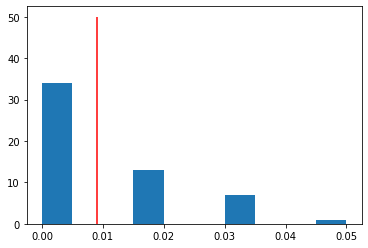

HIDDEN
0.018329326923076924 0.019312757168535352


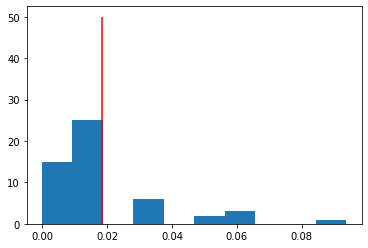

In [40]:
miss_counts=[]
print("RISK")
for sub in risk_df['sub'].unique():
    miss_counts.append(len(
        risk_df[(risk_df['sub']==sub)&(risk_df['response']=='No_resp')])/len(
    risk_df[(risk_df['sub']==sub)]))
                       
plt.hist(miss_counts, bins =10)
plt.vlines(x=np.mean(miss_counts),ymin=0,ymax=50,color='r')
print(np.mean(miss_counts),np.std(miss_counts))
plt.show()

print("HIDDEN")
miss_counts=[]
for sub in amb_df['sub'].unique():
    miss_counts.append(len(
        amb_df[(amb_df['sub']==sub)&(amb_df['response']=='No_resp')])/len(
    amb_df[(amb_df['sub']==sub)]))
                       
plt.hist(miss_counts, bins =10)
plt.vlines(x=np.mean(miss_counts),ymin=0,ymax=50,color='r')
print(np.mean(miss_counts),np.std(miss_counts))
plt.show()

# Reaction Time


In [52]:
print(risk_df[risk_df['response']!='No_resp']['RT'].mean(),
      risk_df[risk_df['response']!='No_resp']['RT'].min(),
      risk_df[risk_df['response']!='No_resp']['RT'].max())

print(amb_df[amb_df['response']!='No_resp']['RT'].mean(),
      amb_df[amb_df['response']!='No_resp']['RT'].min(),
      amb_df[amb_df['response']!='No_resp']['RT'].max())


1.3681069177353877 0.3027523999917321 4.75881749999985
1.4976457746888134 0.3347306998912245 4.293799899984151


# Distribution Description


In [71]:
risk_df['Choose_lot']=np.logical_or((np.logical_and(risk_df.LotisLeft==1,risk_df.response=="['f']")),
(np.logical_and(risk_df.LotisLeft==0,risk_df.response=="['j']")))
bad_100=[]
bad_0=[]
for sub in risk_df['sub'].unique():
    tmp=risk_df[risk_df['sub']==sub]
    bad_100.append(len(
        tmp[(tmp['Lot_per']==100)&(tmp['Choose_lot']==False)]))
    bad_0.append(len(
        tmp[(tmp['Lot_per']==0)&(tmp['Choose_lot']==True)]))
print(np.sum([x>0 for x in bad_100]),np.sum([x>0 for x in bad_0]))

amb_df['Choose_Risk']=np.logical_or((np.logical_and(amb_df.RiskisLeft==1,amb_df.response=="['f']")),
(np.logical_and(amb_df.RiskisLeft==0,amb_df.response=="['j']")))
bad_100=[]
bad_0=[]
for sub in amb_df['sub'].unique():
    tmp=amb_df[amb_df['sub']==sub]
    bad_100.append(len(
        tmp[(tmp['Risk_per']==100)&(tmp['Choose_Risk']==False)]))
    bad_0.append(len(
        tmp[(tmp['Risk_per']==0)&(tmp['Choose_Risk']==True)]))
print(np.sum([x>0 for x in bad_100]),np.sum([x>0 for x in bad_0]))

10 2
0 0


In [69]:
amb_df

,Risk_per,Money,Color,Amb,RiskisLeft,response,RT,dist,sub,Choose_Risk
0,20,8,blue,100,0,['f'],2.662200,wide,sub-1001,False
1,30,8,blue,100,1,['j'],2.286832,wide,sub-1001,False
2,40,8,blue,100,0,['f'],1.986790,wide,sub-1001,False
3,50,8,blue,100,1,['j'],3.408539,wide,sub-1001,False
4,60,8,blue,100,0,['j'],1.825292,wide,sub-1001,True
...,...,...,...,...,...,...,...,...,...,...
59,50,13,yellow,50,1,['f'],0.807101,True_unkown,sub-3223,True
60,60,13,yellow,50,1,['f'],0.671228,True_unkown,sub-3223,True
61,70,13,yellow,50,0,['j'],1.792908,True_unkown,sub-3223,True
62,80,13,yellow,50,1,['f'],1.098411,True_unkown,sub-3223,True


# Choice Regression